In [6]:
import pandas as pd

NAIVE_PATH = 'naive_periodic_experiment'
EXP_DATE = '2024-02-03T22:06:48'

results = {}

for result_file in ['total_X.csv', 'minimal_with_univariate.csv', 'per_switch.csv', 'per_X_flow.csv', 'per_X_port.csv']:
    results[result_file] = pd.read_csv(f'{NAIVE_PATH}/{EXP_DATE}/{result_file}',header=0)

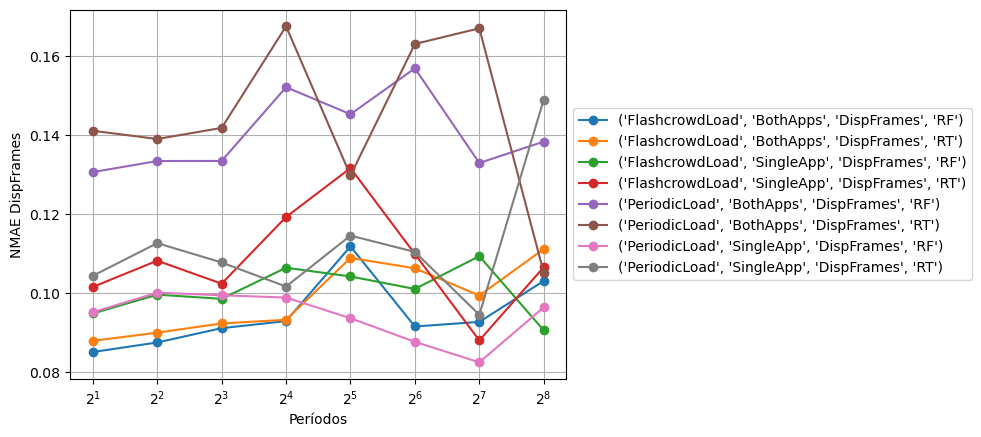

In [7]:
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

#df_with_dispframes_and_reads = results['total_X.csv'][results['total_X.csv']['feature'] != 'noAudioPlayed']
#df_with_dispframes_and_reads = df_with_dispframes_and_reads[df_with_dispframes_and_reads['feature'] != 'WritesAvg']
df_with_dispframes =  results['total_X.csv'][results['total_X.csv']['feature'] == 'DispFrames']


grouped_df = df_with_dispframes.groupby(['carga', 'apps', 'feature', 'método'])

for carga_group, group_data in grouped_df:
    plt.plot(group_data['período'], group_data['nmae'], label=carga_group, drawstyle='default', marker='o')
plt.xscale('log', base=2)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Períodos')
plt.ylabel('NMAE DispFrames')
plt.grid(True)

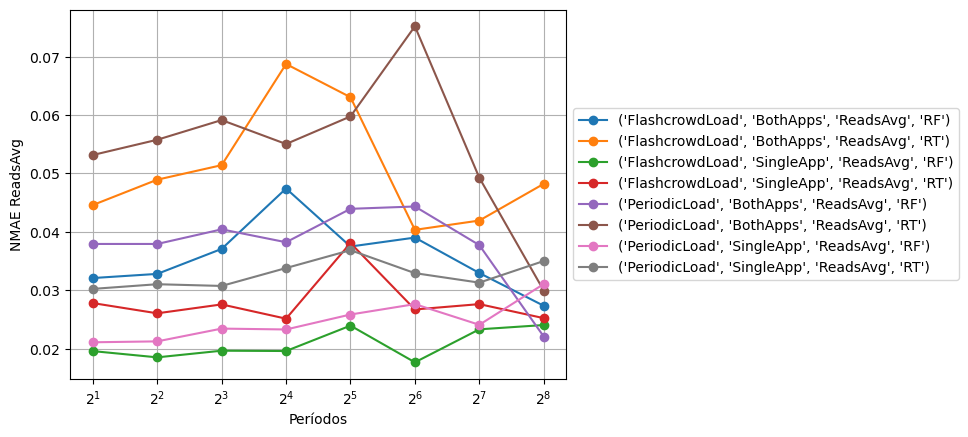

In [8]:
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

df_with_reads =  results['total_X.csv'][results['total_X.csv']['feature'] == 'ReadsAvg']

grouped_df = df_with_reads.groupby(['carga', 'apps', 'feature', 'método'])

for carga_group, group_data in grouped_df:
    plt.plot(group_data['período'], group_data['nmae'], label=carga_group, drawstyle='default', marker='o')
plt.xscale('log', base=2)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Períodos')
plt.ylabel('NMAE ReadsAvg')
plt.grid(True)

In [9]:
df_with_reads[df_with_reads['período'] == 2]

,período,carga,apps,feature,método,nmae,Unnamed: 6
128,2,FlashcrowdLoad,BothApps,ReadsAvg,RT,0.044605,NaN
129,2,FlashcrowdLoad,BothApps,ReadsAvg,RF,0.032120,NaN
160,2,PeriodicLoad,BothApps,ReadsAvg,RT,0.053160,NaN
161,2,PeriodicLoad,BothApps,ReadsAvg,RF,0.037950,NaN
192,2,FlashcrowdLoad,SingleApp,ReadsAvg,RT,0.027839,NaN
193,2,FlashcrowdLoad,SingleApp,ReadsAvg,RF,0.019628,NaN
224,2,PeriodicLoad,SingleApp,ReadsAvg,RT,0.030265,NaN
225,2,PeriodicLoad,SingleApp,ReadsAvg,RF,0.021137,NaN


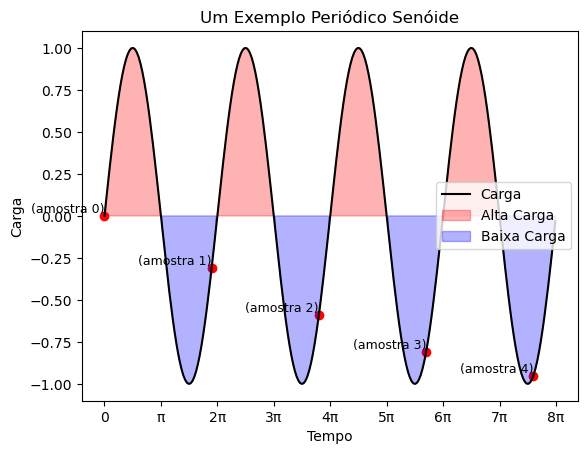

In [150]:
# eventos importantes em outliers
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 8 * np.pi, 0.1) 
y = np.sin(x)

plt.plot(x, y, color='black', label='Carga')

plt.xticks(np.arange(0, 8 * np.pi + 1, np.pi), ['0', 'π', '2π', '3π', '4π', '5π', '6π', '7π', '8π'])
threshold_high = 0
threshold_low = 0

for i in range(5):
    xi = .95 * i * 2 * np.pi
    yi = np.sin(xi)
    plt.scatter(xi, yi, color='red') 
    plt.text(xi, yi, f'(amostra {i})', verticalalignment='bottom', horizontalalignment='right', fontsize=9)

plt.fill_between(x, y, threshold_high, where=(y > threshold_high), color='red', alpha=0.3, label='Alta Carga')
plt.fill_between(x, y, threshold_low, where=(y < threshold_low), color='blue', alpha=0.3, label='Baixa Carga')

plt.xlabel('Tempo')
plt.ylabel('Carga')
plt.title('Um Exemplo Periódico Senóide')

plt.legend()
plt.show()

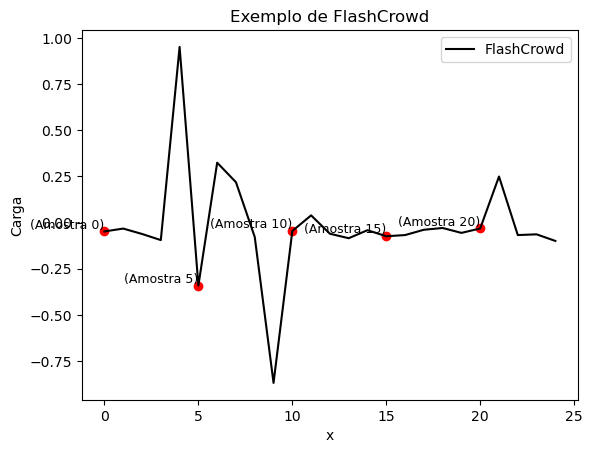

In [161]:
import numpy as np
import matplotlib.pyplot as plt

def spike_function(x):
    if np.random.rand() > 0.75:
        return np.random.choice([-1, 1]) * np.random.rand()
    else:
        return (np.random.rand() - 1)/10

x = np.arange(0, 25)
y = np.array([spike_function(xi) for xi in x])

plt.plot(x, y, color='black', label='FlashCrowd')

for i in range(len(x)):
    if i % 5 == 0:
        plt.scatter(x[i], y[i], color='red', marker='o')
        plt.text(x[i], y[i], f'(Amostra {i})', verticalalignment='bottom', horizontalalignment='right', fontsize=9)
plt.xlabel('x')
plt.ylabel('Carga')
plt.title('Exemplo de FlashCrowd')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [2]:
from dataset_management import parse_traces

x, y = parse_traces('KV-SingleApp-PeriodicLoad', 'ReadsAvg', ['X_cluster.csv', 'X_flow.csv', 'X_port.csv'], nrows=None)

In [27]:
#y.shape

ReadsAvg    106.1628
dtype: float64

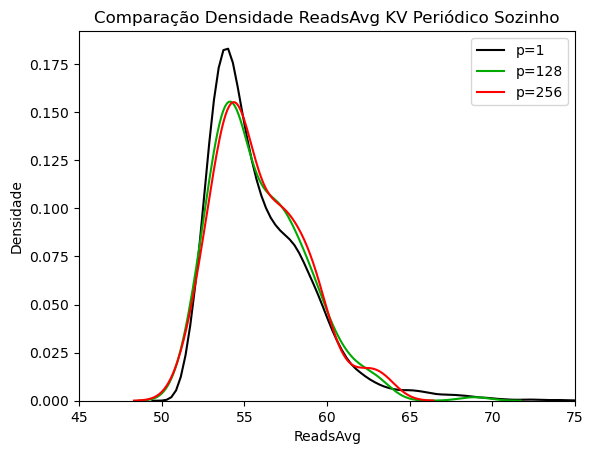

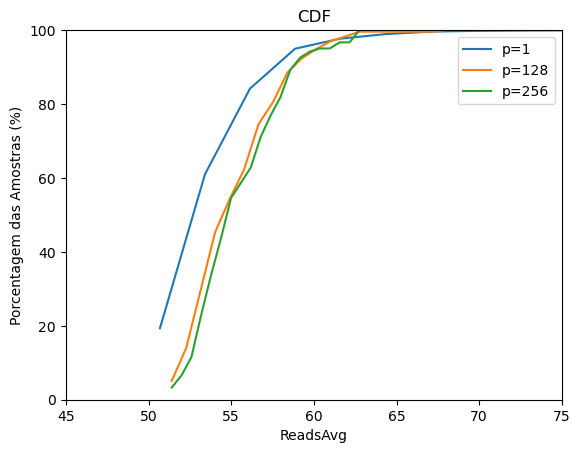

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


y_metric = 'ReadsAvg'



color = {
    1: '#000000',
    128: '#00aa00',
    256: '#ff0000'
}

for period in [1,128,256]:
    x_filtered = x[x.index % period == 0]
    y_filtered = y[y.index % period == 0]
    
    plt.title('Comparação Densidade ReadsAvg KV Periódico Sozinho')

    plt.xlabel(y_metric)
    plt.xlim(45, 75)
    
    plt.ylabel('Densidade')
    
    sns.kdeplot(y_filtered, label=f'p={period}', palette=[color[period]], )
plt.legend()
plt.show()

for period in [1,128,256]:
    x_filtered = x[x.index % period == 0]
    y_filtered = y[y.index % period == 0]
    
    hist, bins = np.histogram(
        y_filtered, bins=20)
    hist = hist / np.sum(hist) * 100

    cdf = np.cumsum(hist)
    
    plt.title('CDF')
    plt.ylabel('Porcentagem das Amostras (%)')
    plt.xlabel(y_metric)
    plt.ylim(0, 100)
    plt.xlim(45, 75)
    plt.plot(bins[:-1], cdf, label=f'p={period}')

plt.legend()
plt.show()
    #plt.savefig(
    #    f'{BASE_RESULTS_PATH}/{period}_{trace}_{y_metric}_dataset.png')


In [ ]:
from dataset_management import parse_traces

x, y = parse_traces('VoD-SingleApp-PeriodicLoad', 'DispFrames', ['X_cluster.csv', 'X_flow.csv', 'X_port.csv'], nrows=None)

/tmp/ipykernel_133105/2195355042.py:16: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.kdeplot(data=y, label='original', palette=palette, ax=ax, fill=True)


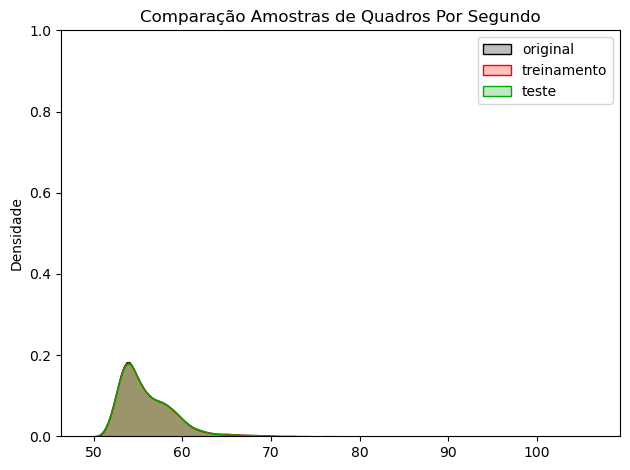

In [33]:
# PARTE STEPWISE MIX/ GERAL PORQUE AVALIO SE OS SPLITS IMPACTAM!

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


import seaborn as sns

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

fig, ax = plt.subplots()

palette = ["#000000", "#ff0000", "#00aa00"]

sns.kdeplot(data=y, label='original', palette=palette, ax=ax, fill=True)
sns.kdeplot(data=y_train, label='treinamento', palette=[palette[1]], ax=ax, fill=True)
sns.kdeplot(data=y_test, label='teste', palette=[palette[2]], ax=ax, fill=True)

ax.legend()
plt.title('Comparação Amostras de Quadros Por Segundo')
plt.ylabel('Densidade')
plt.ylim(0,1)

plt.tight_layout()
plt.show()    
    

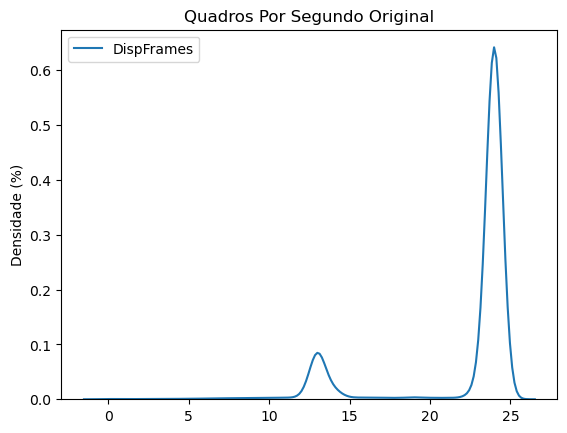

In [13]:

plt.title('Quadros Por Segundo Original')
plt.ylabel('Densidade (%)')

sns.kdeplot(y)
plt.show()
    

In [61]:
from dataset_management import parse_traces

x, y = parse_traces('VoD-SingleApp-PeriodicLoad', 'DispFrames', ['X_cluster.csv', 'X_flow.csv', 'X_port.csv'], nrows=None)

In [82]:
zero_columns = (x == 0).all()

# Count the number of columns that have only 0 values
num_zero_columns = zero_columns.sum()

print("Number of columns with only 0 values:", num_zero_columns/x.shape[1])

Number of columns with only 0 values: 0.8175245806824755


In [85]:
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


import seaborn as sns


result = 'Período,Característica,Score\n'
for period in [1,2,4,8,16,32,64,128,256]:
    x_filtered = x[x.index % period == 0]
    y_filtered = y[y.index % period == 0]

    selector = SelectKBest(score_func=f_regression, k=100)
    
    selector.fit(x_filtered, y_filtered)
    
    feature_scores = -np.log10(selector.pvalues_)
    feature_scores /= feature_scores.max()
    feature_names = x_filtered.columns
    
    feature_scores_df = pd.DataFrame({'Feature': feature_names, 'Score': feature_scores})
    
    feature_scores_df.sort_values(by='Score', ascending=False, inplace=True)
    
    best_feature_names = feature_scores_df['Feature'].head(100).tolist()
    
    worst_feature_name = best_feature_names[-1]

    result += f'{period}' + ',' + worst_feature_name + ',' + f'{feature_scores_df.iloc[99]["Score"]}' + '\n'

    worst_features.setdefault(worst_feature_name, 0)
    worst_features[worst_feature_name] += 1
print(result)


/usr/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
/tmp/ipykernel_133105/3208031153.py:21: RuntimeWarning: divide by zero encountered in log10
  feature_scores = -np.log10(selector.pvalues_)
/tmp/ipykernel_133105/3208031153.py:22: RuntimeWarning: invalid value encountered in divide
  feature_scores /= feature_scores.max()
/usr/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True

Período,Característica,Score
1,0_cpu8_.nice,-0.0
2,0_cpu8_.nice,-0.0
4,0_cpu9_.guest,-0.0
8,3_cpu21_.idle,0.544394201420278
16,3_cpu14_.usr,0.5452212673075854
32,3_cpu11_.usr,0.5637800268016513
64,3_cpu18_.usr,0.4715352921213083
128,3_all_..usr,0.5078011027507648
256,3_cpu16_.idle,0.5096232787480304



/usr/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
/usr/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
/usr/lib/python3.11/site-packages/sklearn/utils/validati

0_cpu8_.nice


/tmp/ipykernel_133105/1381711544.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x_filtered[feature], label=f'{feature} com p={period}' )


0_cpu8_.nice
0_cpu8_.nice


/tmp/ipykernel_133105/1381711544.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x_filtered[feature], label=f'{feature} com p={period}' )
/tmp/ipykernel_133105/1381711544.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x_filtered[feature], label=f'{feature} com p={period}' )


0_cpu8_.nice
0_cpu8_.nice
0_cpu8_.nice


/tmp/ipykernel_133105/1381711544.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x_filtered[feature], label=f'{feature} com p={period}' )
/tmp/ipykernel_133105/1381711544.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x_filtered[feature], label=f'{feature} com p={period}' )
/tmp/ipykernel_133105/1381711544.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x_filtered[feature], label=f'{feature} com p={period}' )
/tmp/ipykernel_133105/1381711544.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x_filtered[feature], label=f'{feature} com p={period}' )
/tmp/ipykernel_133105/1381711544.py:21: UserWarning: Dataset has 0 variance; skipping densit

0_cpu8_.nice
0_cpu8_.nice
0_cpu8_.nice


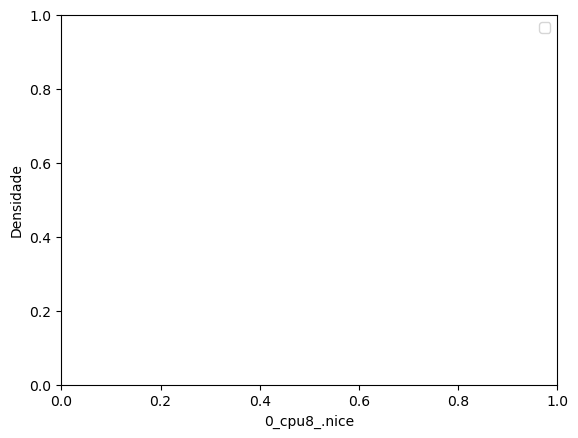

0_cpu8_.nice


/tmp/ipykernel_133105/1381711544.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x_filtered[feature], label=f'{feature} com p={period}' )


0_cpu8_.nice
0_cpu8_.nice


/tmp/ipykernel_133105/1381711544.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x_filtered[feature], label=f'{feature} com p={period}' )
/tmp/ipykernel_133105/1381711544.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x_filtered[feature], label=f'{feature} com p={period}' )


0_cpu8_.nice
0_cpu8_.nice
0_cpu8_.nice


/tmp/ipykernel_133105/1381711544.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x_filtered[feature], label=f'{feature} com p={period}' )
/tmp/ipykernel_133105/1381711544.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x_filtered[feature], label=f'{feature} com p={period}' )
/tmp/ipykernel_133105/1381711544.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x_filtered[feature], label=f'{feature} com p={period}' )
/tmp/ipykernel_133105/1381711544.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x_filtered[feature], label=f'{feature} com p={period}' )
/tmp/ipykernel_133105/1381711544.py:21: UserWarning: Dataset has 0 variance; skipping densit

0_cpu8_.nice
0_cpu8_.nice
0_cpu8_.nice


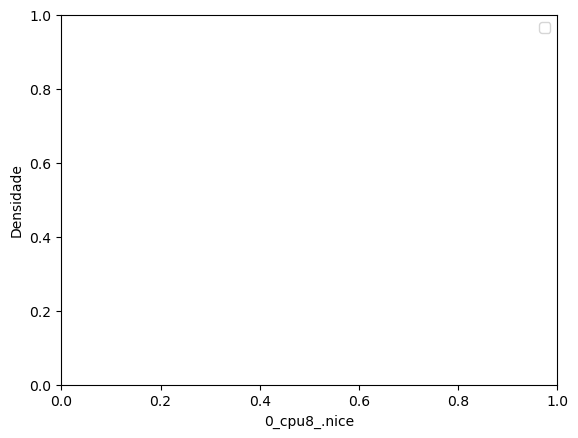

0_cpu9_.guest


/tmp/ipykernel_133105/1381711544.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x_filtered[feature], label=f'{feature} com p={period}' )


0_cpu9_.guest
0_cpu9_.guest


/tmp/ipykernel_133105/1381711544.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x_filtered[feature], label=f'{feature} com p={period}' )
/tmp/ipykernel_133105/1381711544.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x_filtered[feature], label=f'{feature} com p={period}' )


0_cpu9_.guest
0_cpu9_.guest
0_cpu9_.guest


/tmp/ipykernel_133105/1381711544.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x_filtered[feature], label=f'{feature} com p={period}' )
/tmp/ipykernel_133105/1381711544.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x_filtered[feature], label=f'{feature} com p={period}' )
/tmp/ipykernel_133105/1381711544.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x_filtered[feature], label=f'{feature} com p={period}' )
/tmp/ipykernel_133105/1381711544.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x_filtered[feature], label=f'{feature} com p={period}' )
/tmp/ipykernel_133105/1381711544.py:21: UserWarning: Dataset has 0 variance; skipping densit

0_cpu9_.guest
0_cpu9_.guest
0_cpu9_.guest


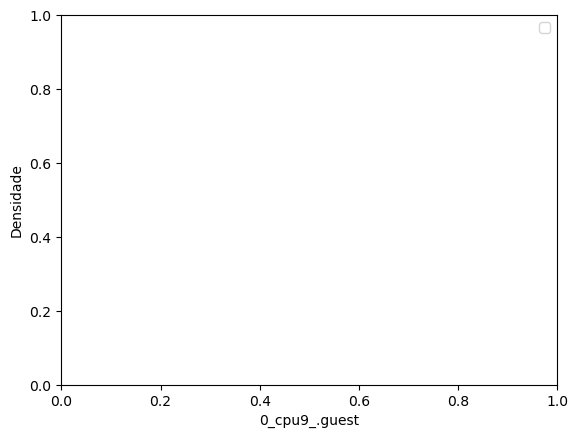

3_cpu21_.idle
3_cpu21_.idle
3_cpu21_.idle
3_cpu21_.idle
3_cpu21_.idle
3_cpu21_.idle
3_cpu21_.idle
3_cpu21_.idle
3_cpu21_.idle


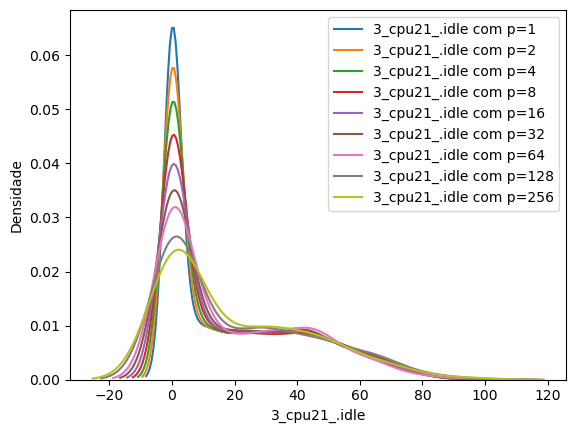

3_cpu14_.usr
3_cpu14_.usr
3_cpu14_.usr
3_cpu14_.usr
3_cpu14_.usr
3_cpu14_.usr
3_cpu14_.usr
3_cpu14_.usr
3_cpu14_.usr


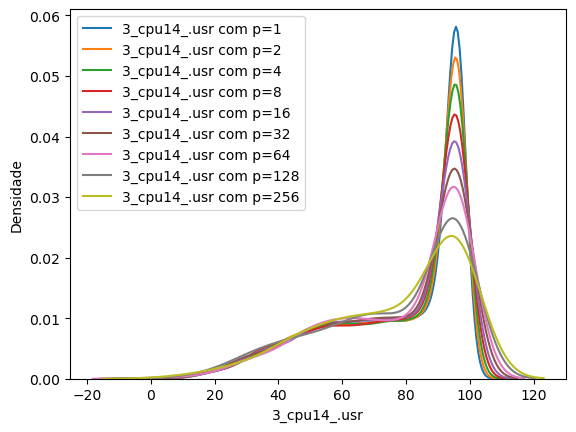

3_cpu11_.usr
3_cpu11_.usr
3_cpu11_.usr
3_cpu11_.usr
3_cpu11_.usr
3_cpu11_.usr
3_cpu11_.usr
3_cpu11_.usr
3_cpu11_.usr


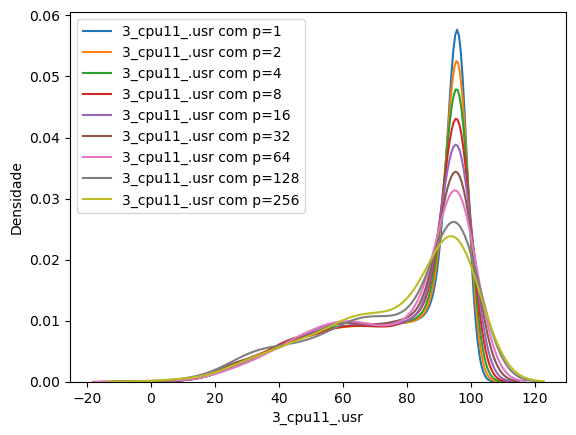

3_cpu18_.usr
3_cpu18_.usr
3_cpu18_.usr
3_cpu18_.usr
3_cpu18_.usr
3_cpu18_.usr
3_cpu18_.usr
3_cpu18_.usr
3_cpu18_.usr


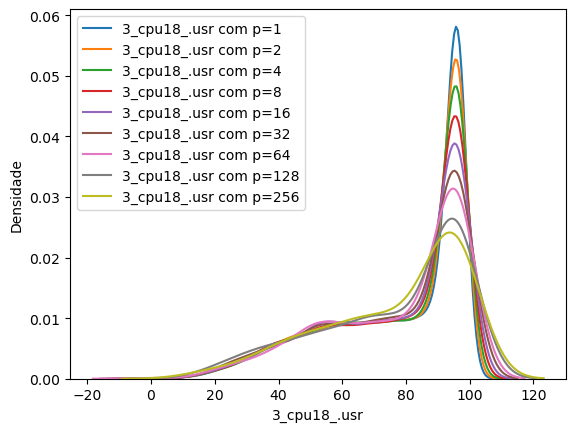

3_all_..usr
3_all_..usr
3_all_..usr
3_all_..usr
3_all_..usr
3_all_..usr
3_all_..usr
3_all_..usr
3_all_..usr


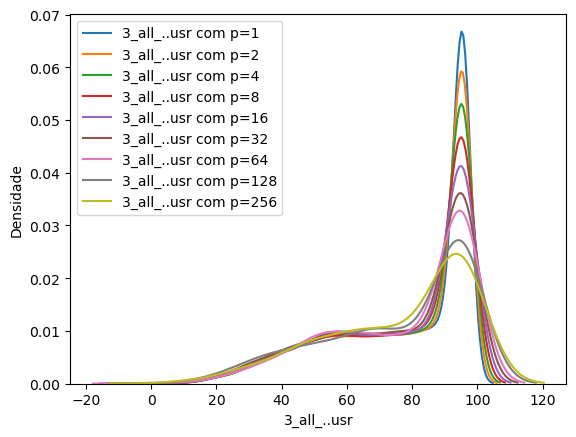

3_cpu16_.idle
3_cpu16_.idle
3_cpu16_.idle
3_cpu16_.idle
3_cpu16_.idle
3_cpu16_.idle
3_cpu16_.idle
3_cpu16_.idle
3_cpu16_.idle


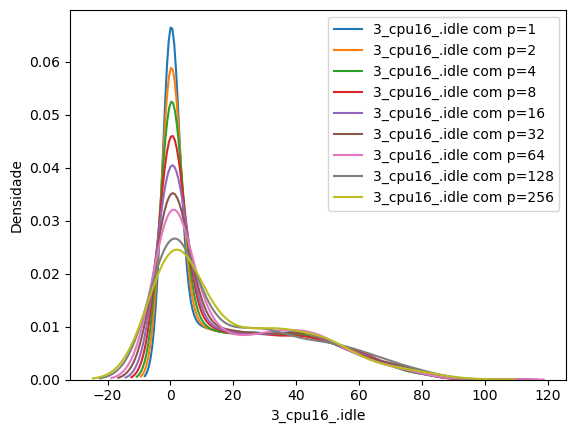

In [94]:
for feature in ["0_cpu8_.nice",
"0_cpu8_.nice",
"0_cpu9_.guest",
"3_cpu21_.idle",
"3_cpu14_.usr",
"3_cpu11_.usr",
"3_cpu18_.usr",
"3_all_..usr",
"3_cpu16_.idle"
]:
    for period in [1,2,4,8,16,32,64,128,256]:
        x_filtered = x[x.index % period == 0]
        y_filtered = y[y.index % period == 0]
        
        plt.xlabel(feature)
        #plt.xlim(45, 75)
        
        plt.ylabel('Densidade')

        print(feature)
        sns.kdeplot(x_filtered[feature], label=f'{feature} com p={period}' )
    plt.legend()
    plt.show()

3_all_..usr
3_all_..usr
3_all_..usr
3_all_..usr
3_all_..usr
3_all_..usr
3_all_..usr
3_all_..usr
3_all_..usr


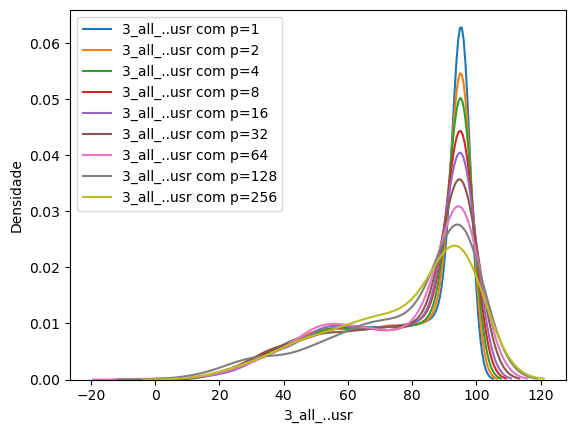

In [95]:
for feature in ["3_all_..usr",
]:
    for period in [1,2,4,8,16,32,64,128,256]:
        x_filtered = x[x.index % period == 0]
        y_filtered = y[y.index % period == 0]

        x_train, x_test, y_train, y_test = train_test_split(x_filtered, y_filtered, test_size=0.3)

        plt.xlabel(feature)
        #plt.xlim(45, 75)
        
        plt.ylabel('Densidade')

        print(feature)
        sns.kdeplot(x_train[feature], label=f'{feature} com p={period}' )
    plt.legend()
    plt.show()